In [3]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

dataset_path = 'maps'

image_size = (16, 16)

data = []
labels = []

In [4]:
for folder in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder)
    if os.path.isdir(folder_path):
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            image = cv2.imread(file_path)
            if image is not None:
                image = cv2.resize(image, image_size)
                data.append(image.flatten())
                labels.append(folder)

In [5]:
data = np.array(data)
labels = np.array(labels)

In [6]:
le = LabelEncoder()
labels = le.fit_transform(labels)

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [7]:
clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC()

Hinge Loss: 0.1156
Accuracy: 68.59%


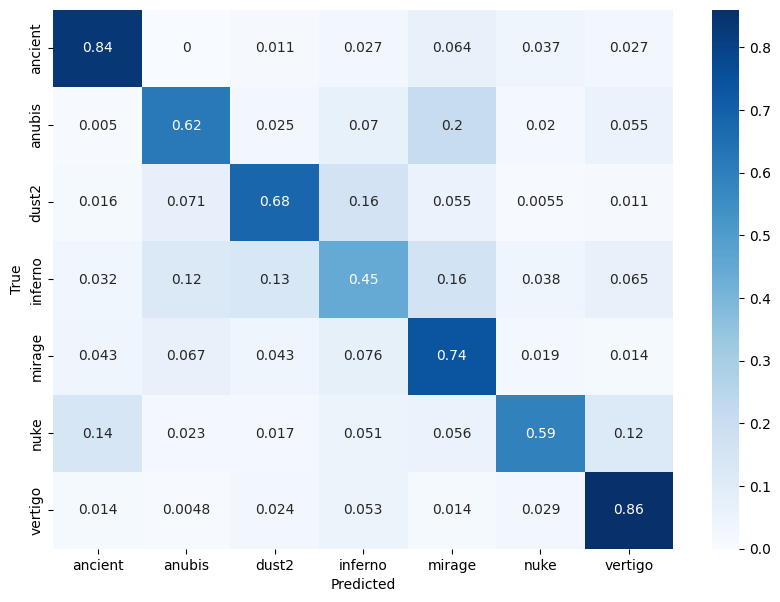

In [10]:
from sklearn.metrics import hinge_loss

y_pred = clf.predict(X_test)

y_test_transformed = np.where(y_test == 0, -1, 1)  # Convert labels for hinge loss calculation
y_pred_transformed = np.where(y_pred == 0, -1, 1)

# Compute the hinge loss
loss = hinge_loss(y_test_transformed, y_pred_transformed)
print(f"Hinge Loss: {loss:.4f}")

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

cm = confusion_matrix(y_test, y_pred, normalize='true')

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()